In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib import dates as mdates
from collections import Counter
import datetime

In [2]:
def make_delta(entry):
    h, m, s = entry.split(':')
    return h, m, s

In [3]:
df_original = pd.read_csv('ViewingActivity.csv',index_col=False)
df_original = df_original.sort_values(by='Start Time')
# df_original[['Hours','Minutes','Seconds']] = df_original[['Duration']].applymap(lambda entry: make_delta(entry))
df_original[['Hours','Minutes','Seconds']] = df_original['Duration'].str.split(':',n=2,expand=True)
df_original['Hours'] = pd.to_numeric(df_original['Hours'])
df_original['Minutes'] = pd.to_numeric(df_original['Minutes'])
df_original['Seconds'] = pd.to_numeric(df_original['Seconds'])
df = df_original.copy()
df.drop(['Attributes', 'Supplemental Video Type', 'Device Type','Country', 'Bookmark', 'Latest Bookmark'],axis=1,inplace=True)

In [4]:
df_tiago = df[df['Profile Name']=='Tiago'].copy()
df_tiago.drop(['Profile Name'],axis=1,inplace=True)

print(len(df_tiago))

drop_list = list()
drop_list.append(df_tiago[((df_tiago['Minutes'] < 1) & (df_tiago['Hours'] < 1))].index)

for i in drop_list:
    df_tiago.drop(i,inplace=True)

print(len(df_tiago))

df_tiago[['Date','Time']] = df_tiago['Start Time'].str.split(' ',n=1,expand=True)
df_tiago[['Show','Season','Episode']] = df_tiago['Title'].str.split(':',n=2,expand=True)
df_tiago['Episode'] = df_tiago['Episode'] .replace([None], '')
df_tiago['Season'] = df_tiago['Season'] .replace([None], '')
df_tiago['Time'] = df_tiago['Time'] .replace([None], '')


8124
7230


In [5]:
def total_duration(df):
    hours = df['Hours'].sum()
    minutes = df['Minutes'].sum()
    seconds = df['Seconds'].sum()
    total_seconds = int(hours*3600) + int(minutes*60) + seconds

    total_minutes = int(total_seconds/60)
    rest_sec = int(total_seconds%60)

    total_hours = int(total_minutes/60)
    rest_min = int(total_minutes%60)

    total_days = int(total_hours/24)
    rest_hours = int(total_hours%24)

    print('Segundos:',str(total_seconds) + ' secs')
    print('Minutos:',str(total_minutes) + 'min ' + str(rest_sec) + ' secs')
    print('Horas:',str(total_hours) + 'h ' + str(rest_min) + 'min ' + str(rest_sec) + ' secs')
    print('Total:',str(total_days) + ' dias ' + str(rest_hours) + 'h ' + str(rest_min) + 'min ' + str(rest_sec) + ' secs')

total_duration(df_tiago)

Segundos: 11022901 secs
Minutos: 183715min 1 secs
Horas: 3061h 55min 1 secs
Total: 127 dias 13h 55min 1 secs


C:\Users\tiago\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


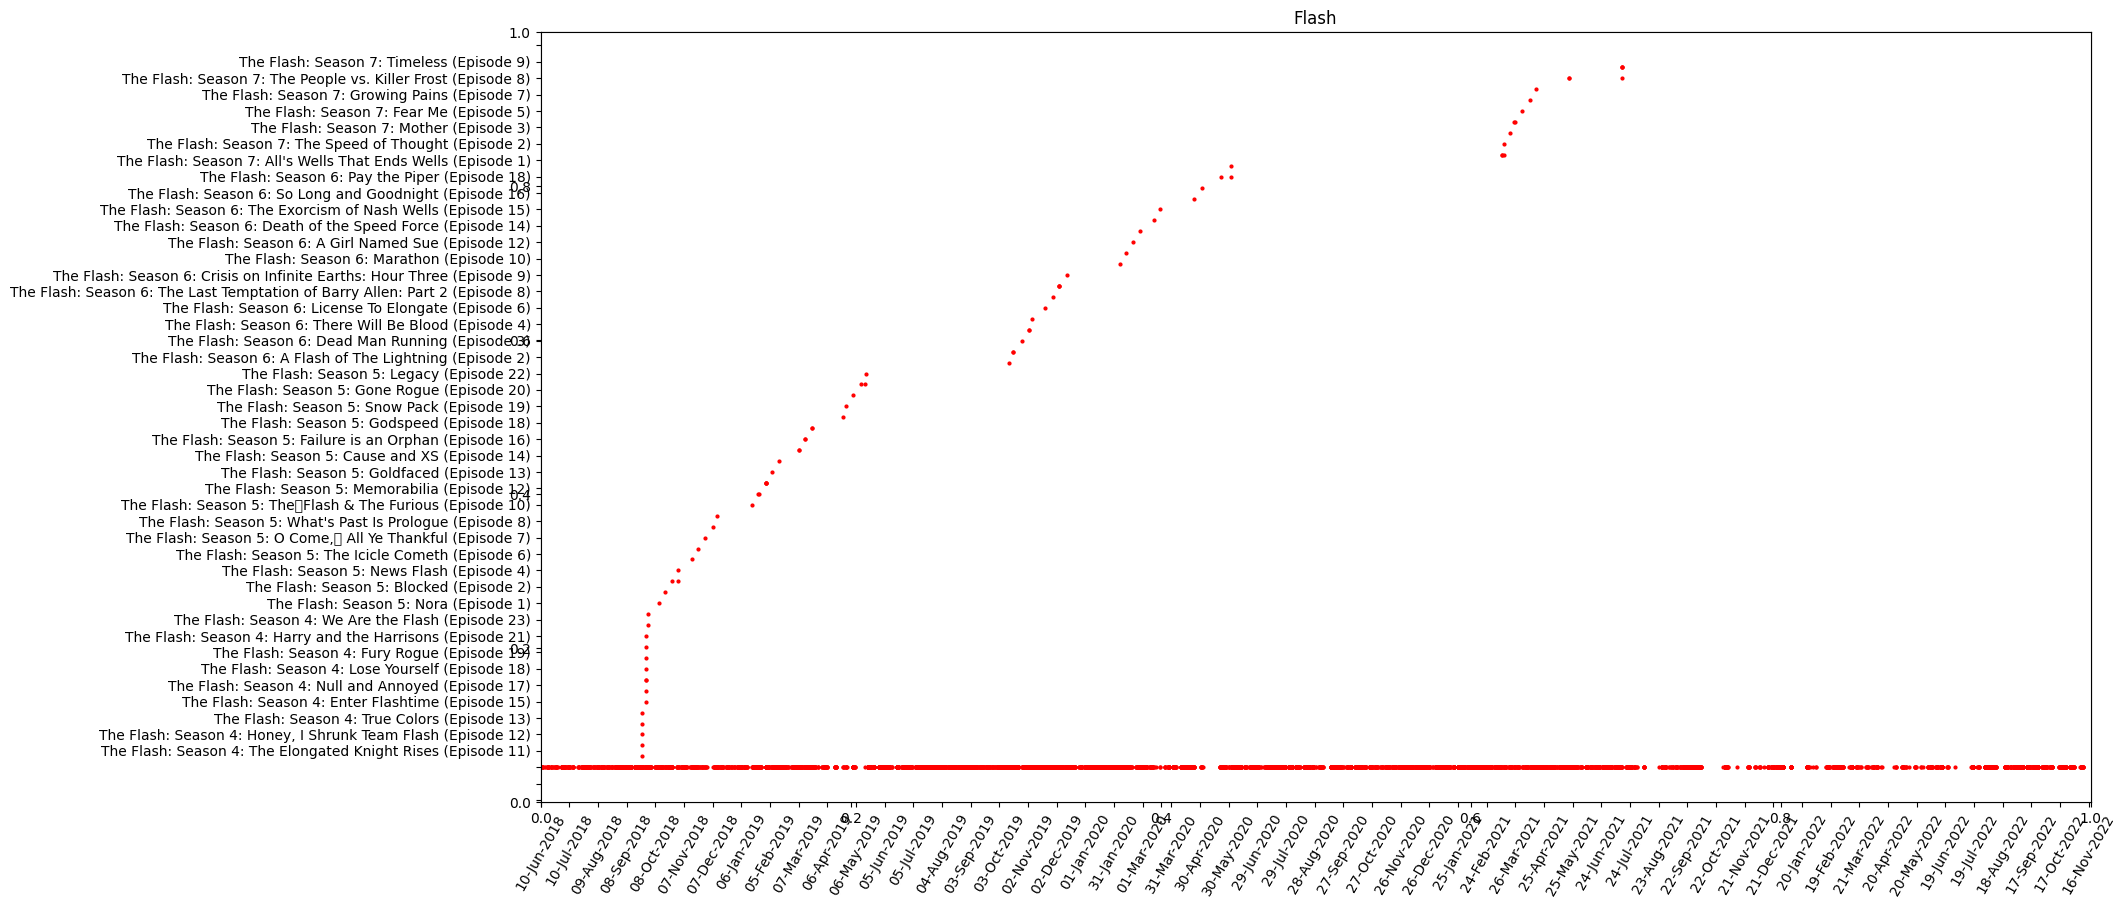

In [6]:
title = 'Flash'

time = pd.to_datetime(df_tiago['Date'].copy())
show = np.where(df_tiago['Show'].str.contains(title), df_tiago['Title'], '')

# duration = np.where(df_tiago['Show'] == title, df_tiago['Duration'],'')

# total_duration(pd.to_datetime(duration))


plt.figure(figsize=(20,10))
plt.title(title)
dtFmt = mdates.DateFormatter('%d-%b-%Y')
ax = plt.axes()
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(50))
# plt.ylim(bottom=1)
plt.plot(time, show,'ro',markersize=2)
plt.xticks(rotation=60, fontweight='light')
plt.xlim([pd.to_datetime('2018-06-10'),pd.to_datetime('2022-11-18')])
# plt.xlim([pd.to_datetime('2019-03-15'),pd.to_datetime('2019-03-22')])
plt.show()

Segundos: 160075 secs
Minutos: 2667min 55 secs
Horas: 44h 27min 55 secs
Total: 1 dias 20h 27min 55 secs


C:\Users\tiago\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


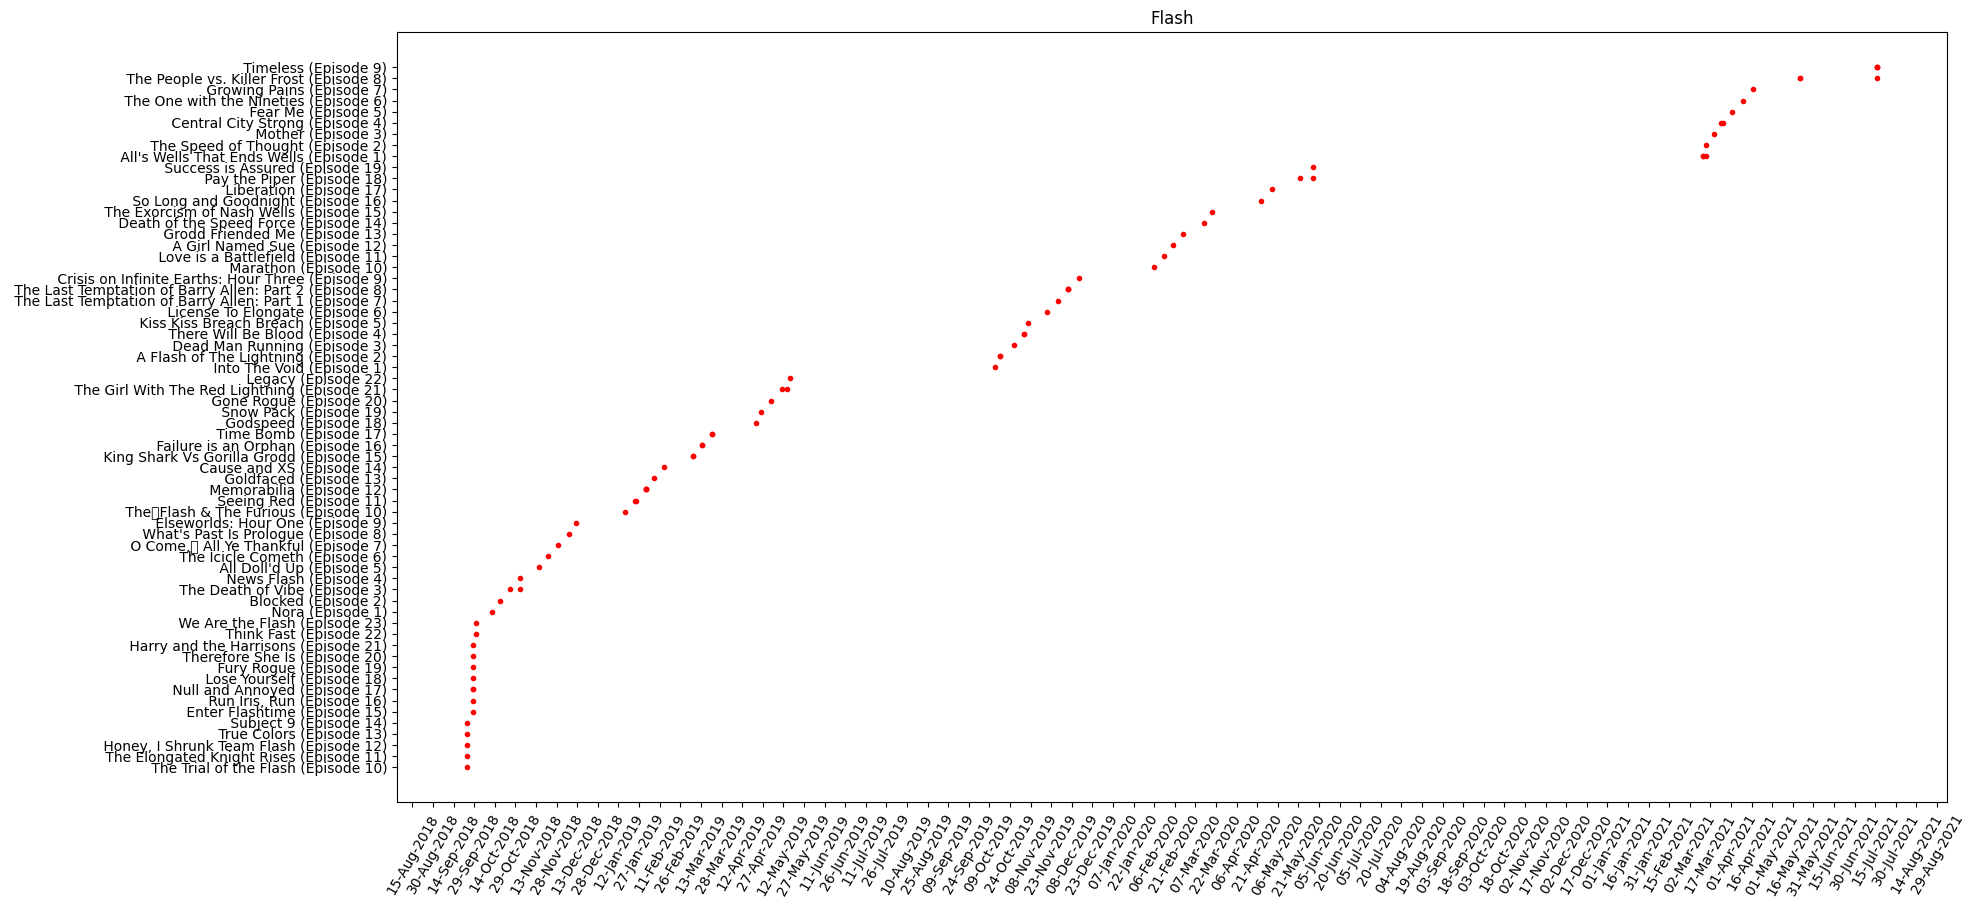

In [12]:
title = 'Flash'

show = df_tiago[df_tiago['Show'].str.contains(title)].copy()
time = pd.to_datetime(show['Date'].copy())

total_duration(show)


plt.figure(figsize=(20,10))
plt.title(title)
dtFmt = mdates.DateFormatter('%d-%b-%Y')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
# plt.gca().yaxis.set_major_formatter(plt.MaxNLocator(50))
# plt.ylim(bottom=1)
plt.plot(time, show['Episode'],'ro',markersize=3)
plt.xticks(rotation=60, fontweight='light')
plt.show()



In [8]:


# Counter(df_tiago['Show'])

# print(Counter(df_tiago['Show']).most_common())

In [9]:
# # print(Counter(df_tiago['Date']).elements)
# date = np.asarray(str(df_tiago['Date']))

# count = np.zeros((1085))
# seen = np.zeros((1085))

# i = 0
# j=0
# for each in range(8650):
#     if date[each] == date[each-1]:
#         count[i] +=1
#     else:
#         seen[j-1] = date[each]
#         j+=1
#     i+=1


# # values = np.asarray(Counter(df_tiago['Date']).most_common())

# # values.sort(axis=0)
# # vY = np.zeros((1085))
# # i=0
# # for v in values:
# #     vY[i] = int(v[1])
# #     i+=1

# plt.figure(figsize=(20,7.5))
# dtFmt = mdates.DateFormatter('%Y-%b-%d')
# plt.gca().xaxis.set_major_formatter(dtFmt) 
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# plt.xticks(rotation=90, fontweight='light')
# plt.title('Episodios por dia')
# plt.ylabel('Nº Episódios')
# plt.plot(pd.to_datetime(values[:,0]), vY)

Title: Flash
Segundos: 160075 secs
Minutos: 2667min 55 secs
Horas: 44h 27min 55 secs
Total: 1 dias 20h 27min 55 secs
[' Season 4', ' Season 5', ' Season 6', ' Season 7']


C:\Users\tiago\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


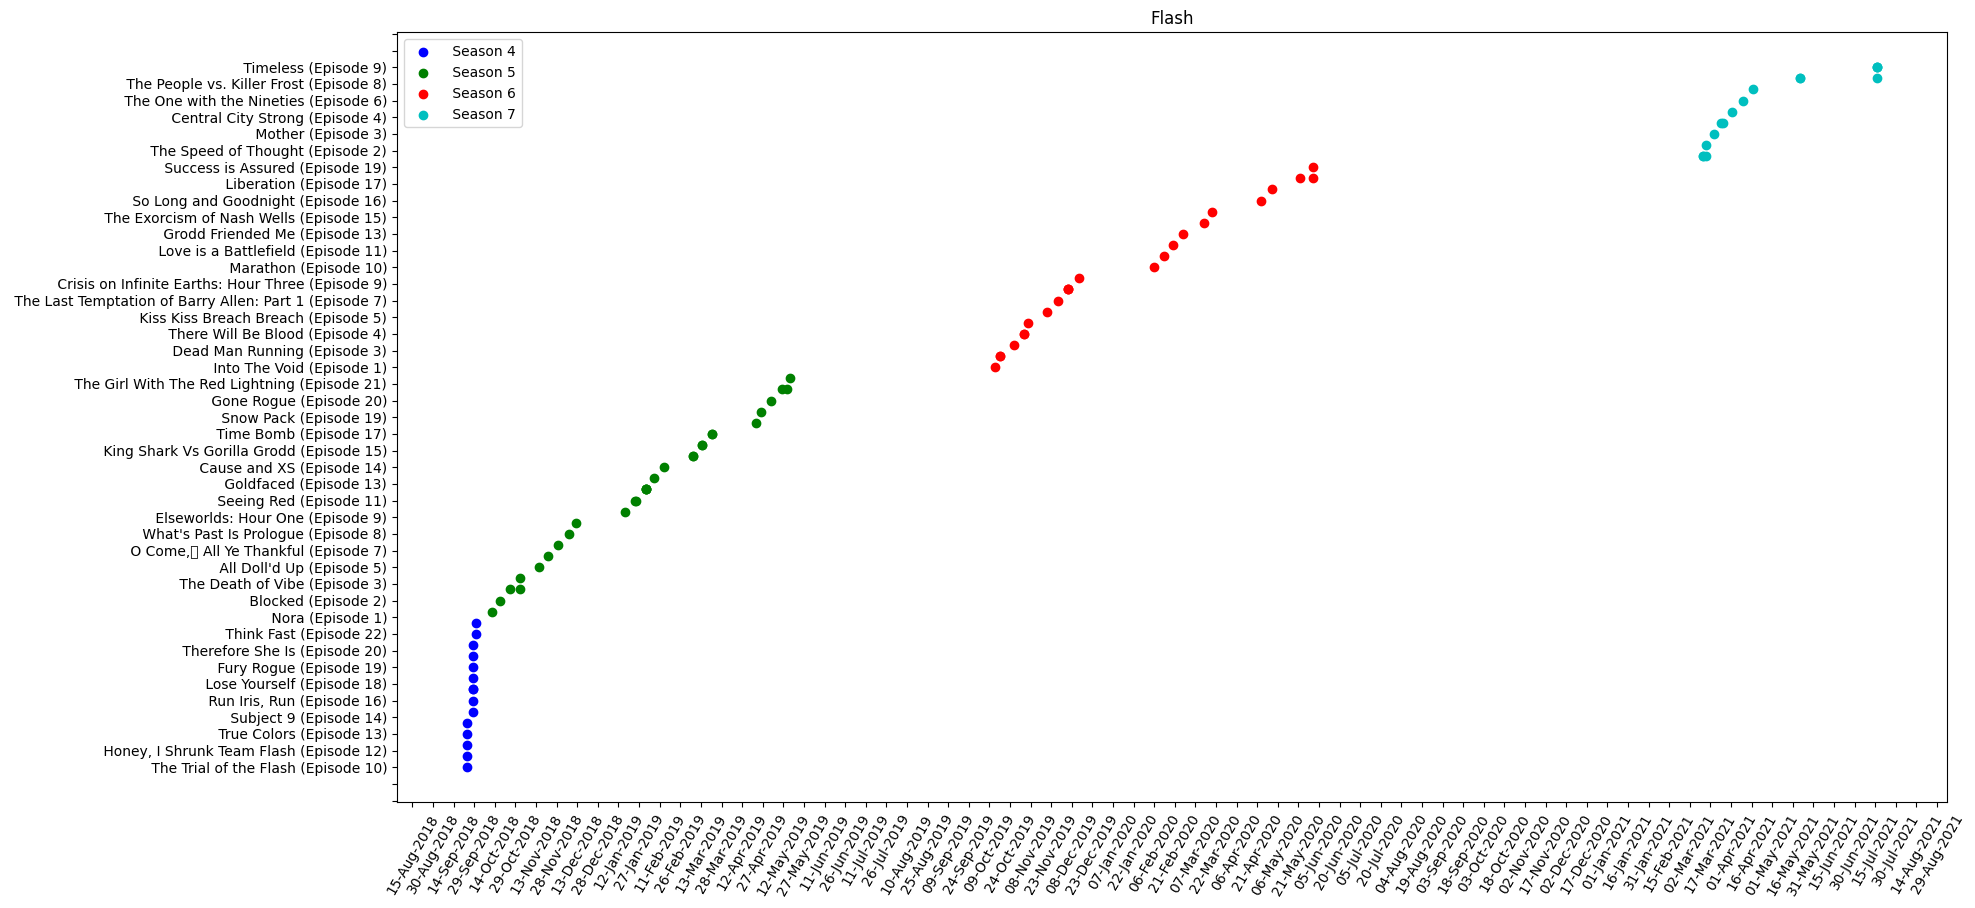

In [14]:
title = 'Flash'

show = df_tiago[df_tiago['Show'].str.contains(title)].copy()
time = pd.to_datetime(show['Date'].copy())

print('Title:', title)
total_duration(show)

seasons = list()
for s in show['Season']:
    if s != '':
        if s not in seasons:
            seasons.append(s)

print(seasons)

plt.figure(figsize=(20,10))
plt.title(title)
dtFmt = mdates.DateFormatter('%d-%b-%Y')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(50))
plt.xticks(rotation=60, fontweight='light')

colors = ['b', 'g', 'r', 'c','hotpink', 'yellow', 'greenyellow', 'orange','purple', 'gold', 'darkturquoise', 'fuchsia', 'gold']
temps = list()
date = list()
i=0
for temp in seasons:
    for ep,s,d in zip(show['Episode'],show['Season'],show['Date']):
        if s == temp:
            temps.append(ep)
            date.append(d)
    plt.scatter(pd.to_datetime(date), temps,color=colors[i],label=temp)
    temps.clear()
    date.clear()
    i += 1

plt.legend()
plt.show()

C:\Users\tiago\AppData\Local\Temp\ipykernel_33880\2652397922.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()
C:\Users\tiago\AppData\Local\Temp\ipykernel_33880\2652397922.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()
C:\Users\tiago\AppData\Local\Temp\ipykernel_33880\2652397922.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()


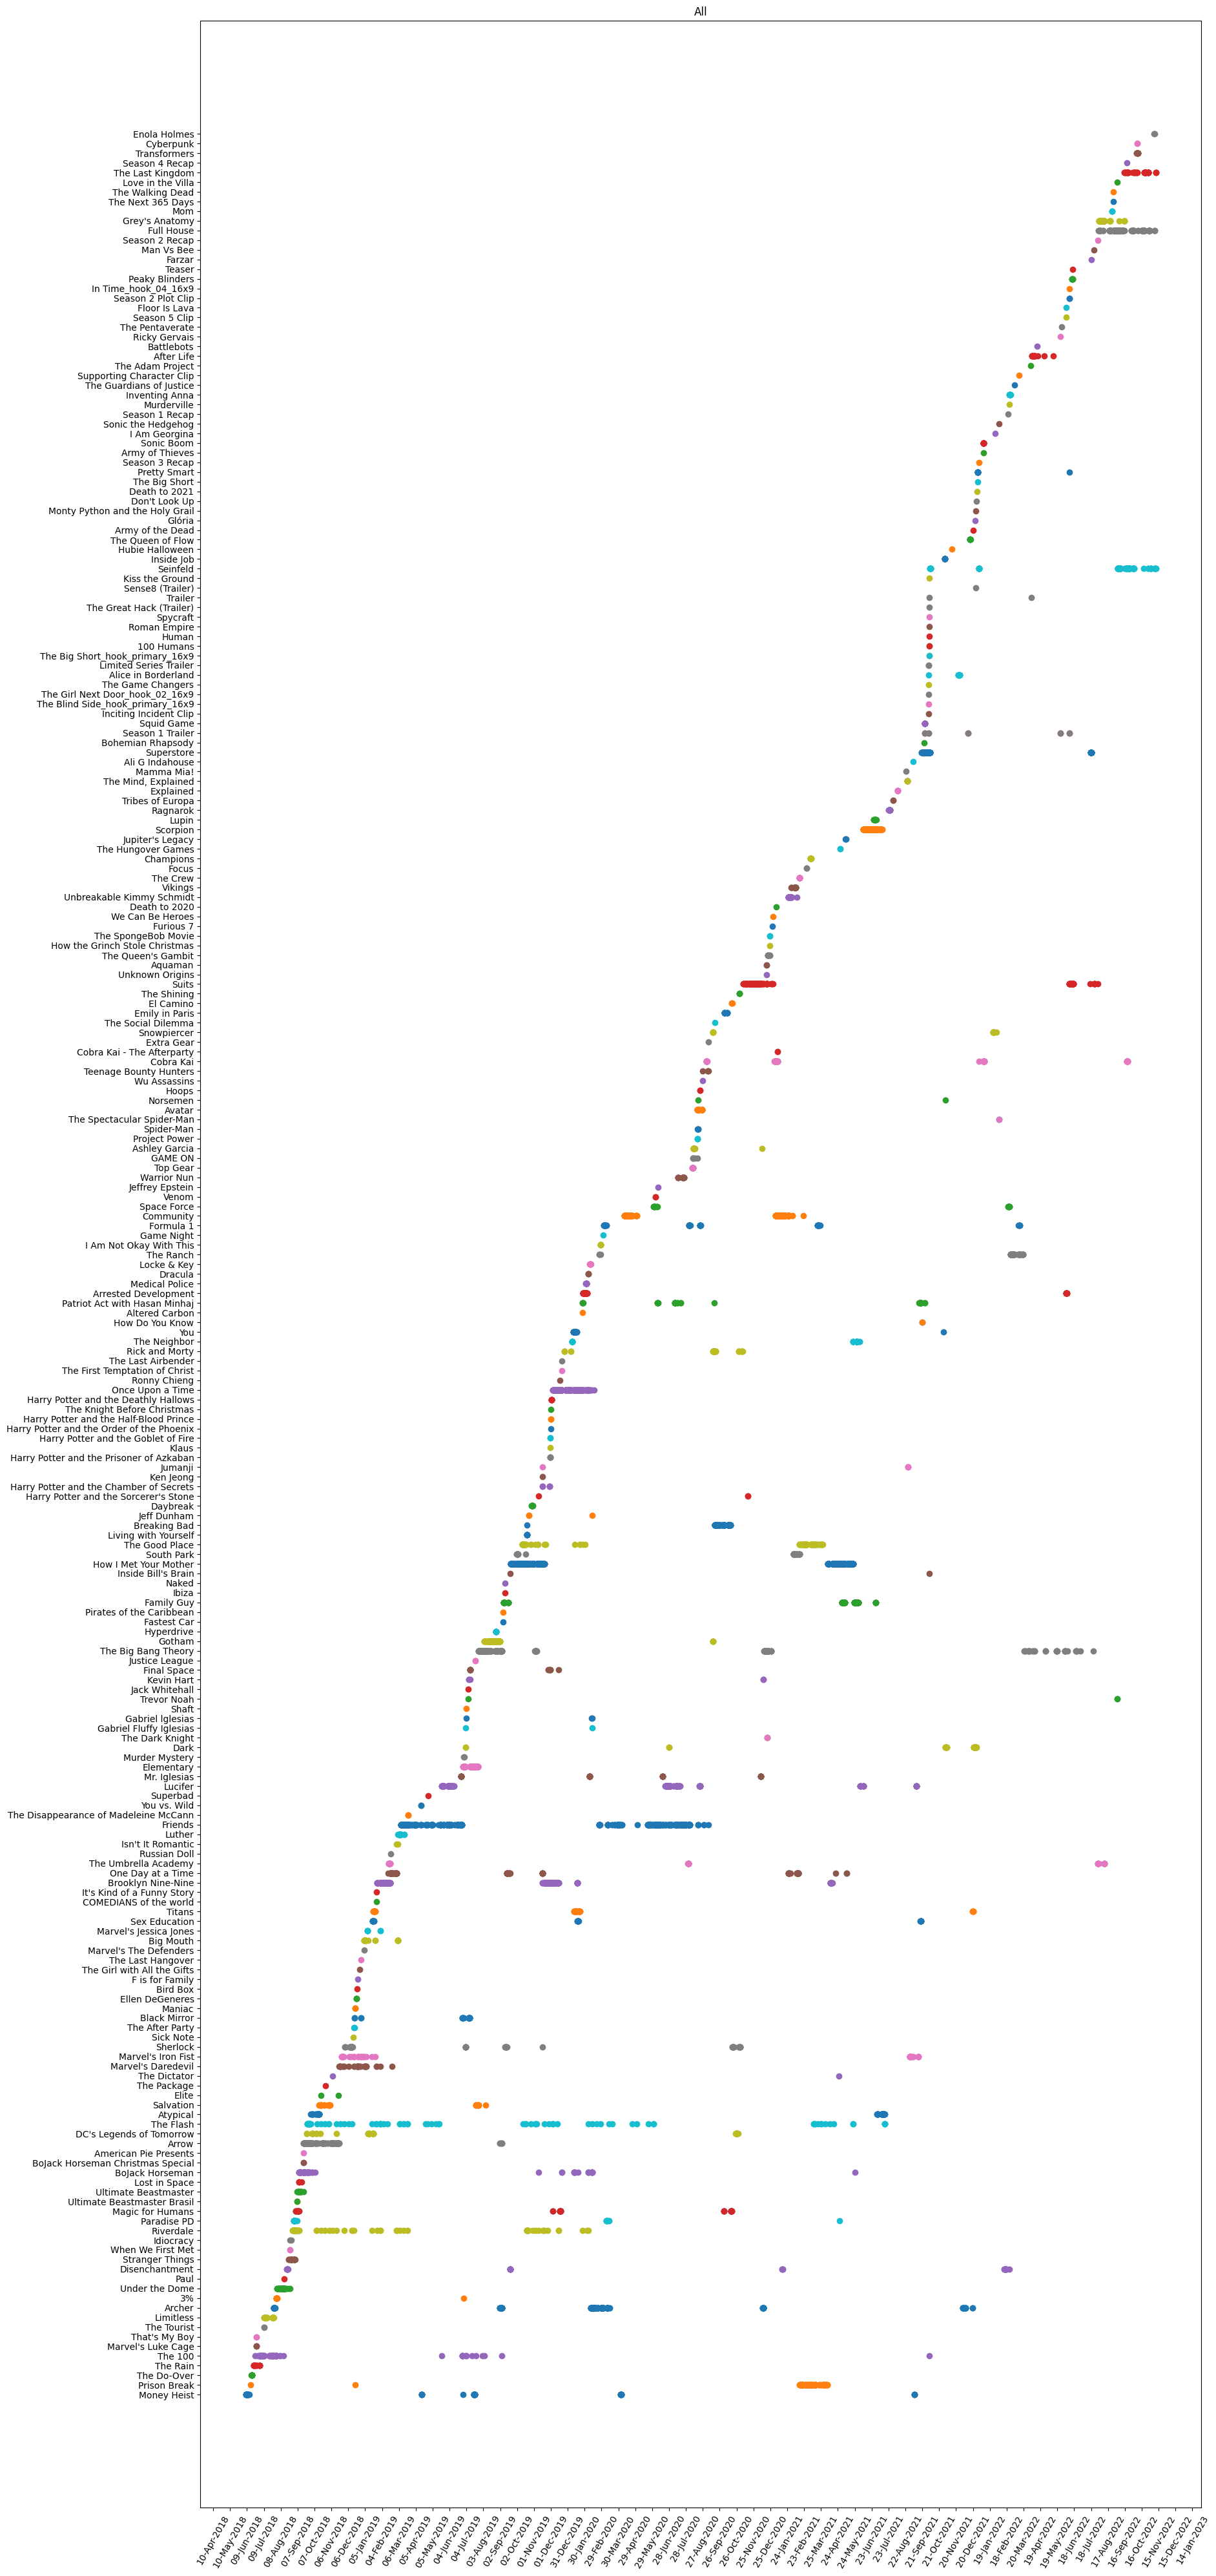

In [11]:
shows = list()
for s in df_tiago['Show']:
    if s != '':
        if s not in shows:
            shows.append(s)
# print(shows)

plt.figure(figsize=(20,50))
plt.title('All')

for each in shows:
    try:
        show = df_tiago[df_tiago['Show'].str.contains(each)].copy()
        time = pd.to_datetime(show['Date'].copy())
    except:
        pass
    
    dtFmt = mdates.DateFormatter('%d-%b-%Y')
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    # plt.gca().yaxis.set_major_locator(plt.MaxNLocator(75))
    plt.xticks(rotation=60, fontweight='light')
    plt.scatter(pd.to_datetime(time), show['Show'],label=each)

plt.show()